<h1 style="text-align: center;">Task-8HD: Data Cleansing and Text Analysis Challenge</h1>
<h3 style="text-align: right;">Name: Yatharth Deoly</h3>
<h3 style="text-align: right;">StudentId: 224207854</h3>
<h3 style="text-align: right;">EmailId: yatharthdeoly@gmail.com</h3>


## Introduction
In this case study we will be learning the usage of data cleansing and text analysis using regex and more. So for understanding these concepts we have taken data from [Skeptics](skeptics.stackexchange.com) where Skeptics Stack Exchange is a question and answer site for scientific skepticism.
So here we will be referring to different datasets, i.e.:
- Posts
   - Id
  - PostTypeId (listed in the PostTypes table)
    - 1 = Question
    - 2 = Answer
    - 3 = Orphaned tag wiki
    - 4 = Tag wiki excerpt
    - 5 = Tag wiki
    - 6 = Moderator nomination
    - 7 = "Wiki placeholder" (Appears to include auxiliary site content like the help center introduction, election description, and the tour page's introduction, ask, and don't ask   sections)
    - 8 = Privilege wiki
  - AcceptedAnswerId (only present if PostTypeId = 1)
  - ParentId (only present if PostTypeId = 2)
  - CreationDate
  - DeletionDate (only non-null for the SEDE PostsWithDeleted table. Deleted posts are not present on Posts. Column not present on data dump.)
  - Score (generally non-zero for only Questions, Answers, and Moderator Nominations)
  - ViewCount (nullable)
  - Body (as rendered HTML, not Markdown)
  - OwnerUserId (only present if user has not been deleted; always -1 for tag wiki entries, i.e. the community user owns them)
  - OwnerDisplayName (nullable)
  - LastEditorUserId (nullable)
  - LastEditorDisplayName (nullable)
  - LastEditDate (e.g. 2009-03-05T22:28:34.823) - the date and time of the most recent edit to the post (nullable)
  - LastActivityDate (e.g. 2009-03-11T12:51:01.480) - datetime of the post's most recent activity
  - Title - question title (PostTypeId = 1), or on Stack Overflow, the tag name for some tag wikis and excerpts (PostTypeId = 4/5)
  - Tags - question tags (PostTypeId = 1), or on Stack Overflow, the subject tag of some tag wikis and excerpts (PostTypeId = 4/5)
  - AnswerCount - the number of undeleted answers (only present if PostTypeId = 1)
  - CommentCount (nullable)
  - FavoriteCount (nullable)
  - ClosedDate (present only if the post is closed)
  - CommunityOwnedDate (present only if post is community wiki'd
  - ContentLicense  


- Users
  - Id
  - Reputation
  - CreationDate
  - DisplayName
  - LastAccessDate (Datetime user last loaded a page; updated every 30 min at most)
  - WebsiteUrl
  - Location
  - AboutMe
  - Views (Number of times the profile is viewed)
  - UpVotes (How many upvotes the user has cast)
  - DownVotes
  - ProfileImageUrl
  - EmailHash (now always blank)
  - AccountId (User's Stack Exchange Network profile ID)


- Comments
  - Id
  - PostId
  - Score
  - Text (Comment body)
  - CreationDate
  - UserDisplayName
  - UserId (Optional. Absent if user has been deleted)
  - ContentLicense

- Badges
  - Id
  - UserId
  - Name (Name of the badge)
  - Date (e.g. 2008-09-15T08:55:03.923)
  - Class
     - 1 = Gold
     - 2 = Silver
     - 3 = Bronze
  - TagBased = True if badge is for a tag, otherwise it is a named badge


- PostHistory
  - Id
  - PostHistoryTypeId (listed in the PostHistoryTypes table)
     - 1 = Initial Title - initial title (questions only)
     - 2 = Initial Body - initial post raw body text
     - 3 = Initial Tags - initial list of tags (questions only)
     - 4 = Edit Title - modified title (questions only)
     - 5 = Edit Body - modified post body (raw markdown)
     - 6 = Edit Tags - modified list of tags (questions only)
     - 7 = Rollback Title - reverted title (questions only)
     - 8 = Rollback Body - reverted body (raw markdown)
     - 9 = Rollback Tags - reverted list of tags (questions only)
     - 10 = Post Closed - post voted to be closed
     - 11 = Post Reopened - post voted to be reopened
     - 12 = Post Deleted - post voted to be removed
     - 13 = Post Undeleted - post voted to be restored
     - 14 = Post Locked - post locked by moderator
     - 15 = Post Unlocked - post unlocked by moderator
     - 16 = Community Owned - post now community owned
     - 17 = Post Migrated - post migrated - now replaced by 35/36 (away/here)
     - 18 = Question Merged - question merged with deleted question
     - 19 = Question Protected - question was protected by a moderator.
     - 20 = Question Unprotected - question was unprotected by a moderator.
     - 21 = Post Disassociated - OwnerUserId removed from post by admin
     - 22 = Question Unmerged - answers/votes restored to previously merged question
     - 24 = Suggested Edit Applied
     - 25 = Post Tweeted
     - 31 = Comment discussion moved to chat
     - 33 = Post notice added - comment contains foreign key to PostNotices
     - 34 = Post notice removed - comment contains foreign key to PostNotices
     - 35 = Post migrated away - replaces id 17
     - 36 = Post migrated here - replaces id 17
     - 37 = Post merge source
     - 38 = Post merge destination
     - 50 = Bumped by Community User
     - 52 = Question became hot network question (main) / Hot Meta question (meta)
     - 53 = Question removed from hot network/meta questions by a moderator
     - 66 = Created from Ask Wizard
     - 23 = Unknown dev related event
     - 26 = Vote nullification by dev (ERM?)
     - 27 = Post unmigrated/hidden moderator migration?
     - 28 = Unknown suggestion event
     - 29 = Unknown moderator event (possibly de-wikification?)
     - 30 = Unknown event (too rare to guess)
  - PostId
  - RevisionGUID: At times more than one type of history record can be recorded by a single action. All of these will be grouped using the same RevisionGUID
  - CreationDate (e.g. 2009-03-05T22:28:34.823)
  - UserId
  - UserDisplayName: populated if a user has been removed and no longer referenced by user Id
  - Comment: This field will contain the comment made by the user who edited a post.
     - If PostHistoryTypeId = 10, this field contains the CloseReasonId of the close reason (listed in CloseReasonTypes):
    - Old close reasons:
- 1 = Exact Duplicate
- 2 = Off-topic
- 3 = Subjective and argumentative
- 4 = Not a real question
- 7 = Too localized
- 10 = General reference
- 20 = Noise or pointless (Meta sites only)
- Current close reasons:
- 101 = Duplicate
- 102 = Off-topic
- 103 = Unclear what you're asking
- 104 = Too broad
- 105 = Primarily opinion-based
- If PostHistoryTypeId in (33,34) this field contains the PostNoticeId of the PostNotice
  - Text: A raw version of the new value for a given revision
- If PostHistoryTypeId in (10,11,12,13,14,15,19,20,35) this column will contain a JSON encoded string with all users who have voted for the PostHistoryTypeId
- If it is a duplicate close vote, the JSON string will contain an array of original questions as OriginalQuestionIds
- If PostHistoryTypeId = 17 this column will contain migration details of either from <url> or to <url>
  - ContentLicense


- PostLinks
  - Id primary key
  - CreationDate when the link was created
  - PostId id of source post
  - RelatedPostId id of target/related post
  - LinkTypeId type of link
- 1 = Linked (PostId contains a link to RelatedPostId)
- 3 = Duplicate (PostId is a duplicate of RelatedPostId)


- Tags
  - Id
  - TagName
  - Count
  - ExcerptPostId (nullable) Id of Post that holds the excerpt text of the tag
  - WikiPostId (nullable) Id of Post that holds the wiki text of the tag
  - IsModeratorOnly
  - IsRequired


- Votes
  - Id
  - PostId
  - VoteTypeId (listed in the VoteTypes table)
- 1 = AcceptedByOriginator
- 2 = UpMod (AKA upvote)
- 3 = DownMod (AKA downvote)
- 4 = Offensive
- 5 = Favorite (AKA bookmark; UserId will also be populated) feature removed after October 2022 / replaced by Saves
- 6 = Close (effective 2013-06-25: Close votes are only stored in table: PostHistory)
- 7 = Reopen
- 8 = BountyStart (UserId and BountyAmount will also be populated)
- 9 = BountyClose (BountyAmount will also be populated)
- 10 = Deletion
- 11 = Undeletion
- 12 = Spam
- 15 = ModeratorReview (i.e., a moderator looking at a flagged post)
- 16 = ApproveEditSuggestion
  - UserId (present only if VoteTypeId in (5,8); -1 if user is deleted)
  - CreationDate Date only (2018-07-31 00:00:00 time data is purposefully removed to protect user privacy)
  - BountyAmount (present only if VoteTypeId in (8,9))

Defining imports at the top that will be used by the report.
In this case, having all the imports at the top is more intuitive than having some of them at the top and some of them scattered over the file.

In [1]:
import csv
import re
import warnings
from xml.etree import ElementTree

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
import pandas as pd
import py7zr
import pycountry

# Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

# Ignore all warnings generated by the Python program
warnings.filterwarnings("ignore")

# This command tells the IPython environment to draw the plots immediately after the current cell
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

import geopandas

Extracting data from `.7z` archive file.

In [2]:
with py7zr.SevenZipFile('skeptics.stackexchange.com.7z', mode='r') as z:
    z.extractall()

In [3]:
def convert_xml_to_csv(xml_file, csv_file, cols):
    """Converts an XML file to a CSV file.
  
    Args:
      xml_file: The path to the XML file.
      csv_file: The path to the CSV file.
      cols: List of headers contain in XML.
    """

    tree = ElementTree.parse(xml_file)
    root = tree.getroot()

    # Create a CSV writer object.
    with open(csv_file, "w") as csvfile:
        writer = csv.writer(csvfile)

        # Write the header row.
        writer.writerow(cols)

        # Iterate over the XML data and write it to the CSV file.
        for row in root:
            writer.writerow([row.get(col) for col in cols])

In [4]:
# Converting `Badges` report to `csv` file
convert_xml_to_csv('Badges.xml', 'Badges.csv', ['Id', 'UserId', 'Name', 'Date', 'Class', 'TagBased'])

In [5]:
# Converting `Comments` report to `csv` file
convert_xml_to_csv('Comments.xml', 'Comments.csv',
                   ['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserDisplayName', 'UserId', 'ContentLicense'])

In [6]:
# Converting `PostHistory` report to `csv` file
convert_xml_to_csv('PostHistory.xml', 'PostHistory.csv',
                   ['Id', 'PostHistoryTypeId', 'PostId', 'RevisionGUID', 'CreationDate', 'UserId', 'UserDisplayName',
                    'Comment', 'Text', 'ContentLicense'])

In [7]:
# Converting `PostLinks` report to `csv` file
convert_xml_to_csv('PostLinks.xml', 'PostLinks.csv', ['Id', 'CreationDate', 'PostId', 'RelatedPostId', 'LinkTypeId'])

In [8]:
# Converting `Posts` report to `csv` file
convert_xml_to_csv('Posts.xml', 'Posts.csv',
                   ['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate', 'DeletionDate', 'Score',
                    'ViewCount', 'Body', 'OwnerUserId', 'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
                    'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount',
                    'ClosedDate', 'CommunityOwnedDate', 'ContentLicense'])

In [9]:
# Converting `Tags` report to `csv` file
convert_xml_to_csv('Tags.xml', 'Tags.csv',
                   ['Id', 'TagName', 'Count', 'ExcerptPostId', 'WikiPostId', 'IsModeratorOnly', 'IsRequired'])

In [10]:
# Converting `Users` report to `csv` file
convert_xml_to_csv('Users.xml', 'Users.csv',
                   ['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate', 'WebsiteUrl', 'Location',
                    'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'ProfileImageUrl', 'EmailHash', 'AccountId'])

In [11]:
# Converting `Votes` report to `csv` file
convert_xml_to_csv('Votes.xml', 'Votes.csv', ['Id', 'PostId', 'VoteTypeId', 'UserId', 'CreationDate', 'BountyAmount'])

Reading `Badges` report just to get some gist.

In [12]:
badges_df = pd.read_csv('Badges.csv')
badges_df.head()

,Id,UserId,Name,Date,Class,TagBased
0,1,1,Autobiographer,2011-02-24T22:22:45.733,3,False
1,2,3,Autobiographer,2011-02-24T23:02:49.247,3,False
2,3,4,Autobiographer,2011-02-24T23:02:49.263,3,False
3,4,4,Precognitive,2011-02-24T23:07:45.017,3,False
4,5,6,Autobiographer,2011-02-24T23:12:52.753,3,False


Reading `Comments` report just to get some gist.

In [13]:
comments_df = pd.read_csv('Comments.csv')
comments_df.head()

,Id,PostId,Score,Text,CreationDate,UserDisplayName,UserId,ContentLicense
0,1,2,1,Does homeopathy require the use of pure distil...,2011-02-24T23:43:40.900,NaN,34.0,CC BY-SA 2.5
1,2,2,0,@Russell - I believe the solvent is supposed t...,2011-02-24T23:45:59.897,NaN,27.0,CC BY-SA 2.5
2,5,17,0,Can you provide links to the fraud finding?,2011-02-24T23:55:43.930,NaN,30.0,CC BY-SA 2.5
3,6,17,3,@morganpdx Russel is certainly refering to And...,2011-02-24T23:58:15.800,NaN,5.0,CC BY-SA 2.5
4,7,17,5,"Godlee F., Smith J., Marcovitch H. ""Wakefield’...",2011-02-24T23:59:22.543,NaN,15.0,CC BY-SA 2.5


Reading `PostHistory` report just to get some gist.

In [14]:
post_history_df = pd.read_csv('PostHistory.csv')
post_history_df.head()

,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,UserDisplayName,Comment,Text,ContentLicense
0,4,2,2,40188fb4-719d-4dbf-9469-5fdc1ae77283,2011-02-24T23:40:35.177,5.0,NaN,NaN,In homeopathic remedies the original substance...,CC BY-SA 2.5
1,5,1,2,40188fb4-719d-4dbf-9469-5fdc1ae77283,2011-02-24T23:40:35.177,5.0,NaN,NaN,The memory of water (Homeopathy),CC BY-SA 2.5
2,6,3,2,40188fb4-719d-4dbf-9469-5fdc1ae77283,2011-02-24T23:40:35.177,5.0,NaN,NaN,<resources>,CC BY-SA 2.5
3,8,2,3,107b6854-3478-4502-bea5-b6ae7422ba33,2011-02-24T23:40:50.440,31.0,NaN,NaN,What is the best evidence available relative t...,CC BY-SA 2.5
4,9,1,3,107b6854-3478-4502-bea5-b6ae7422ba33,2011-02-24T23:40:50.440,31.0,NaN,NaN,Does chamomile really relax ?,CC BY-SA 2.5


Reading `PostLinks` report just to get some gist.

In [15]:
post_links_df = pd.read_csv('PostLinks.csv')
post_links_df.head()

,Id,CreationDate,PostId,RelatedPostId,LinkTypeId
0,1167,2011-02-25T13:18:14.143,42,88,1
1,1318,2011-02-25T15:29:54.307,127,18,1
2,1344,2011-02-25T15:34:20.823,18,127,1
3,1345,2011-02-25T15:37:48.933,128,18,1
4,2721,2011-02-25T22:07:14.133,173,2,1


Reading `Posts` report just to get some gist.

In [16]:
posts_df = pd.read_csv('Posts.csv')
posts_df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,2,1,27.0,NaN,2011-02-24T23:40:35.177,NaN,65,8593.0,<p>In homeopathic remedies the original substa...,5.0,...,2011-08-08T01:47:06.183,2016-04-29T22:48:34.707,Does water have a memory as claimed in homeopa...,<homeopathy><physics>,2.0,5,NaN,NaN,NaN,CC BY-SA 3.0
1,3,1,54.0,NaN,2011-02-24T23:40:50.440,NaN,29,1915.0,<p>What is the best evidence available relativ...,31.0,...,2022-10-13T19:54:30.997,2022-10-13T19:54:30.997,Does chamomile help you to relax?,<nutrition><alternative-medicine><herbalism>,2.0,4,NaN,NaN,NaN,CC BY-SA 4.0
2,12,1,19.0,NaN,2011-02-24T23:48:56.087,NaN,33,2237.0,<p>Some people blame the preservative thiomers...,5.0,...,2011-04-20T19:13:16.780,2018-10-14T15:32:17.517,How dangerous is thiomersal (thimerosal)?,<united-states><vaccines><autism>,3.0,5,NaN,NaN,NaN,CC BY-SA 3.0
3,17,2,NaN,12.0,2011-02-24T23:54:33.883,NaN,31,NaN,<p>Thimersal does <em>not</em> cause autism. ...,34.0,...,2018-09-19T21:59:25.047,2018-09-19T21:59:25.047,NaN,NaN,NaN,4,NaN,NaN,NaN,CC BY-SA 4.0
4,18,1,14371.0,NaN,2011-02-24T23:54:34.630,NaN,67,5760.0,"<p>The <a href=""http://en.wikipedia.org/wiki/P...",5.0,...,2018-10-27T15:48:34.037,2018-10-27T15:48:34.037,Is the placebo effect a purely psychological e...,<placebo><medical-science>,5.0,7,NaN,NaN,NaN,CC BY-SA 4.0


Reading `Tags` report just to get some gist.

In [17]:
tags_df = pd.read_csv('Tags.csv')
tags_df.head()

,Id,TagName,Count,ExcerptPostId,WikiPostId,IsModeratorOnly,IsRequired
0,9,logic,6,NaN,NaN,NaN,NaN
1,11,mercury,9,14406.0,14405.0,NaN,NaN
2,12,vaccines,140,9352.0,9351.0,NaN,NaN
3,13,autism,24,3904.0,3903.0,NaN,NaN
4,14,homeopathy,32,14388.0,14387.0,NaN,NaN


Reading `Users` report just to get some gist.

In [18]:
users_df = pd.read_csv('Users.csv')
users_df.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,EmailHash,AccountId
0,-1,1,2011-02-24T16:38:16.717,Community,2011-02-24T16:38:16.717,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",358,6570,10014,NaN,NaN,-1.0
1,1,101,2011-02-24T22:20:48.370,Geoff Dalgas,2022-08-26T17:05:47.927,http://stackoverflow.com,"Corvallis, OR",<p>Dev #2 who helped create Stack Overflow cur...,1169,8,0,NaN,NaN,2.0
2,2,289,2011-02-24T22:51:02.457,Emmett,2014-03-07T18:19:07.897,http://minesweeperonline.com,"San Francisco, CA","<p>co-founder of <a href=""https://airtable.com...",29,3,0,NaN,NaN,1998.0
3,3,101,2011-02-24T22:58:42.790,Nick Craver,2019-04-13T00:52:16.067,https://nickcraver.com/blog/,"Winston-Salem, NC",<p>I am a Principal Software Engineer at Micro...,20,7,0,NaN,NaN,7598.0
4,4,5684,2011-02-24T22:59:17.453,Richard Stelling,2021-06-30T14:23:09.490,http://richardstelling.com,"Bath, UK",<h3>Tech geek and hopelessly optimistic about ...,181,260,22,NaN,NaN,32189.0


Reading `Votes` report just to get some gist.

In [19]:
votes_df = pd.read_csv('Votes.csv')
votes_df.head()

,Id,PostId,VoteTypeId,UserId,CreationDate,BountyAmount
0,1,1,2,NaN,2011-02-24T00:00:00.000,NaN
1,3,4,2,NaN,2011-02-24T00:00:00.000,NaN
2,4,9,2,NaN,2011-02-24T00:00:00.000,NaN
3,5,11,2,NaN,2011-02-24T00:00:00.000,NaN
4,6,10,2,NaN,2011-02-24T00:00:00.000,NaN


Adding a new column in `Users` dataframe to have the proper decoded country_name value, but still needs more data cleansing and conversion which has been done as deeply.

In [20]:
# State Codes
# https://gist.github.com/rugbyprof/76575b470b6772ce8fa0c49e23931d97
states = {"AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California", "CO": "Colorado",
          "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
          "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana",
          "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota",
          "MS": "Mississippi", "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
          "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York", "NC": "North Carolina",
          "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania",
          "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas",
          "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin",
          "WY": "Wyoming"}


def get_country(data):
    """Get country name from the string.
  
    arg:
      data: String containing country name.
      
    return:
      String of country name
    """
    if len(data) > 1:
        return data[-1]
    return data[0]


def decode_country_name(value):
    """Decodes proper country name from the string.
  
    arg:
      value: String containing country name.
      
    return:
      String of country name or None
    """
    if pd.isna(value): return None
    country = get_country(str(value).split(',')).strip()
    try:
        if len(country) == 2:
            return pycountry.countries.get(alpha_2=country).name
        return pycountry.countries.get(alpha_3=country).name
    except Exception:
        if len(country) == 2:
            return states.get(country)
        return country


users_df['New_Location'] = users_df.Location.apply(decode_country_name)
users_df.sample(n=5)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,EmailHash,AccountId,New_Location
4182,5064,1,2011-10-17T11:43:50.393,Mobilediesel,2017-04-17T20:27:04.910,http://dl.dropbox.com/u/1055489/mobilediesel/i...,"42.2050°N, 83.4850°W",NaN,0,0,0,NaN,NaN,260868.0,83.4850°W
43153,61310,1,2021-11-19T11:02:57.063,acebsa,2021-11-19T11:02:57.063,NaN,"201 N Los Angeles St UNIT 17, Los Angeles, CA ...",<p>The All City Employees Benefits Service Ass...,0,0,0,NaN,NaN,21004021.0,CA 90012
12160,18549,1,2014-04-03T19:29:00.517,LightBearer,2014-04-03T19:29:00.517,NaN,NaN,NaN,0,0,0,NaN,NaN,2067421.0,None
2693,3309,101,2011-06-04T04:18:31.397,Rajesh D,2020-03-12T12:37:12.847,NaN,"Hyderabad, India","<p><a href=""https://arxiv.org/abs/2011.11258"" ...",4,0,0,NaN,NaN,389341.0,India
25925,40110,1,2017-05-04T07:38:47.330,mrfonda,2017-05-04T07:38:47.330,NaN,"Tel Aviv-Yafo, Israel",NaN,0,0,0,NaN,NaN,9912549.0,Israel


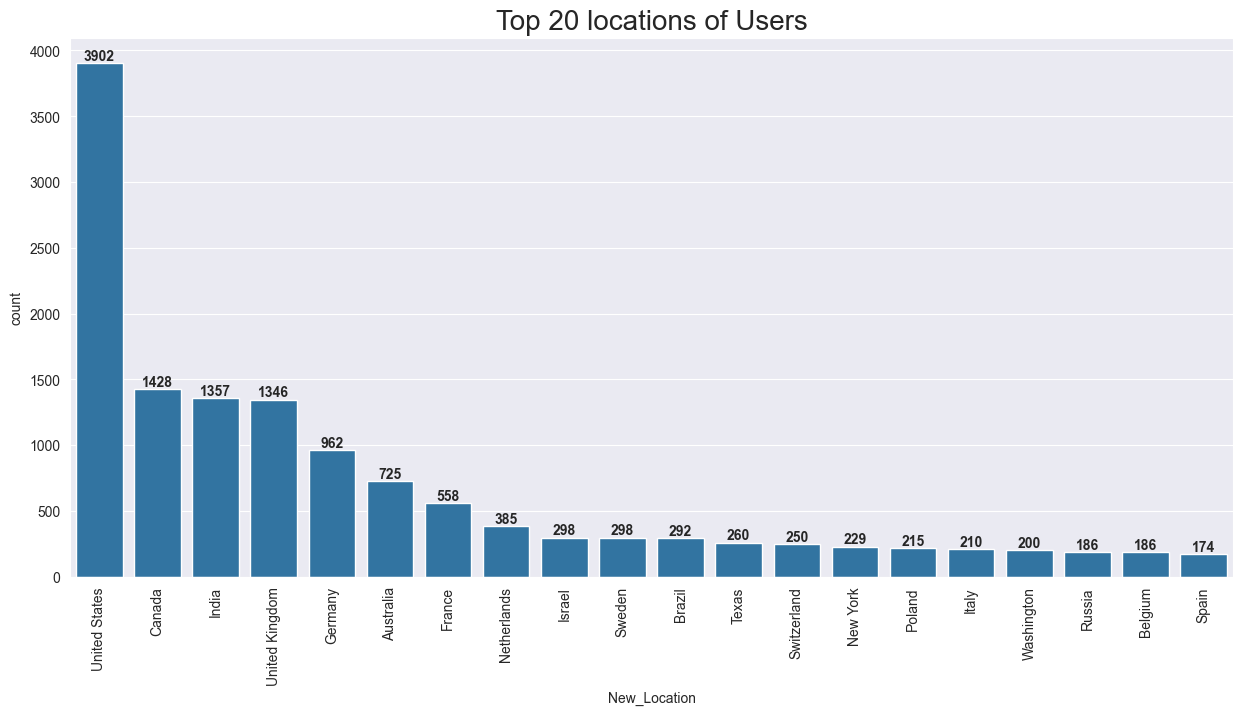

In [21]:
# set the figure size
plt.figure(figsize=(15, 7))

# Creating bar plot
ax = sns.barplot(users_df['New_Location'].value_counts().reset_index()[:20], x='New_Location', y='count')

# Annotate Bars in bar plot
for i in ax.containers:
    ax.bar_label(i, fontweight='bold')

# Set title and x-axis labels 
plt.xticks(rotation=90)
plt.title('Top 20 locations of Users', fontsize=20)

# Display plot
plt.show()

As per the visualization, we can derive:
- Users from the United States location have most accounts i.e. 3902.
- Users from the India location come 3rd who have 1357 accounts.

For more clearance, I need to perform more data cleansing, to derive to Country level location coding.

Now will be depicting our above observation in a world map, from where users have created the account.

In [22]:
def convert_country_3_code(country):
    """
    Converting country name to 3 digit country code 
    :param country: string of country name or None
    :return: 3 digit country code or None
    """
    try:
        return pycountry.countries.get(name=country).alpha_3.upper()
    except:
        return None


users_df['Country_Code'] = users_df['New_Location'].apply(convert_country_3_code)

# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns = ['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

# then merge with our data 
merge = pd.merge(world, users_df['Country_Code'].value_counts().reset_index(), left_on='CODE', right_on='Country_Code')

# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location = pd.read_csv(
    'https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge = merge.merge(location, on='name').sort_values(by='count', ascending=False).reset_index()

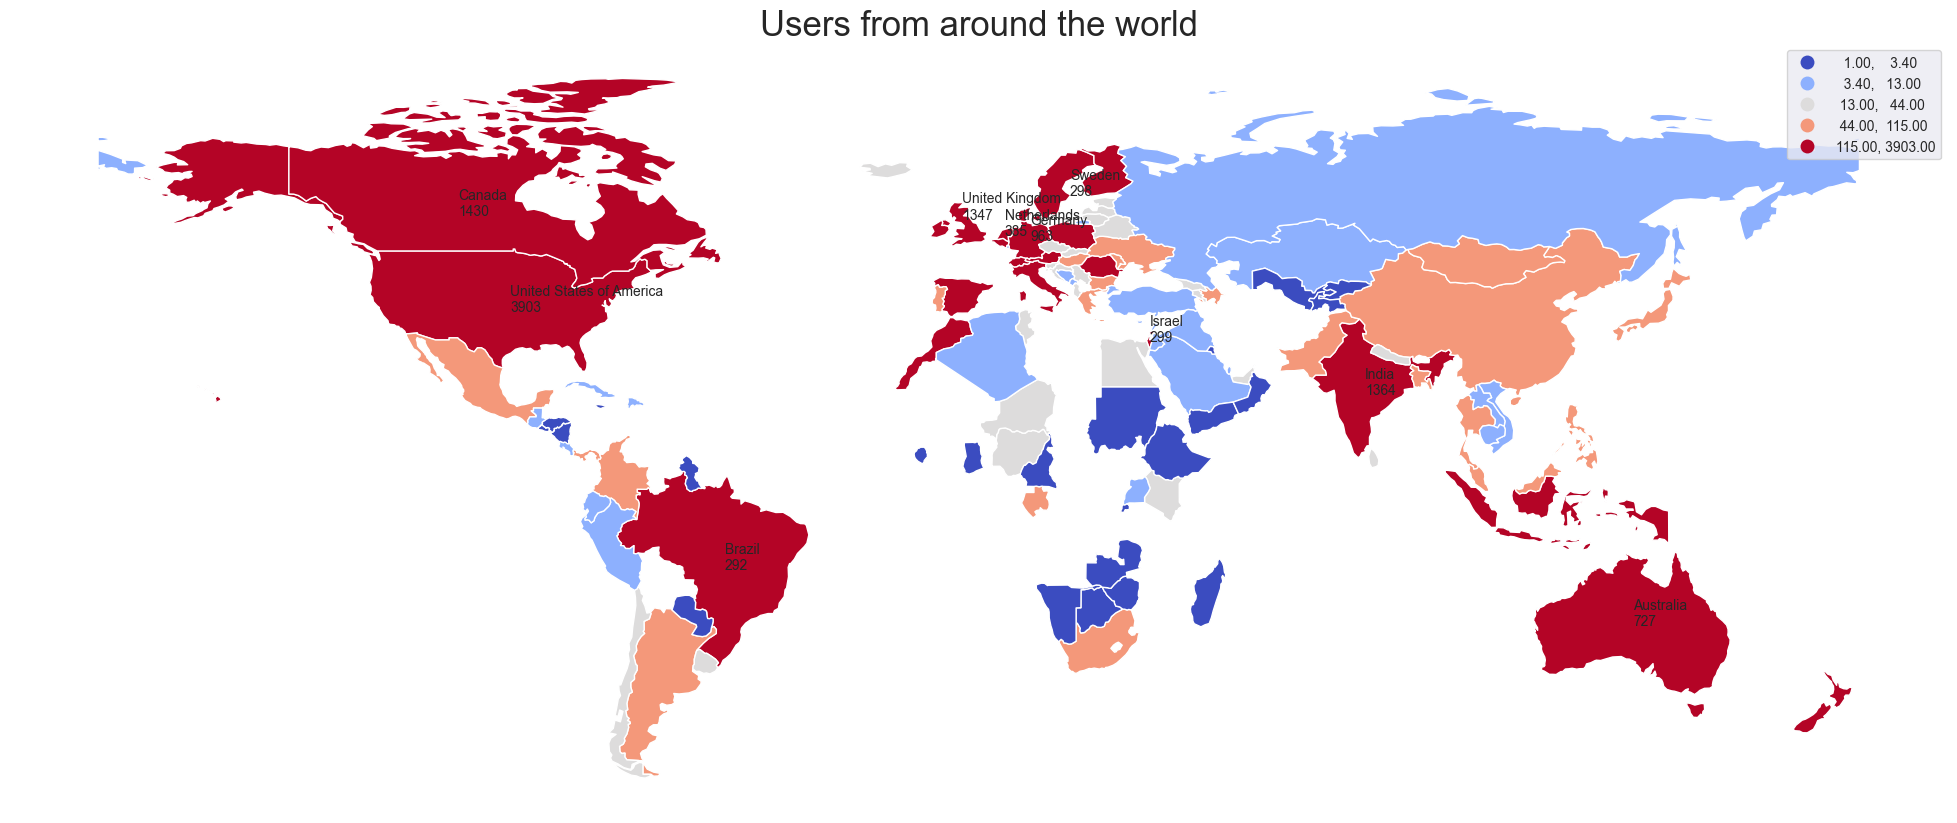

In [23]:
# plot confirmed cases world map 
merge.plot(column='count', scheme="quantiles",
           figsize=(25, 20),
           legend=True, cmap='coolwarm')

plt.title('Users from around the world', fontsize=25)
plt.axis('off')
plt.grid(None)

# add countries names and num of users for top 10
for i in range(0, 10):
    plt.text(float(merge.longitude[i]), float(merge.latitude[i]), "{}\n{}".format(merge.name[i], merge['count'][i]),
             size=10)

plt.show()

As we have plotted a world map graph where we can see, from all over the world, users have created their account in `Skeptics`.

Here will be understanding different tags that have been used in `Posts` report.
Using `WordCloud` will be showing different words that have been used and will be differentiating between them via size, which has been used most.

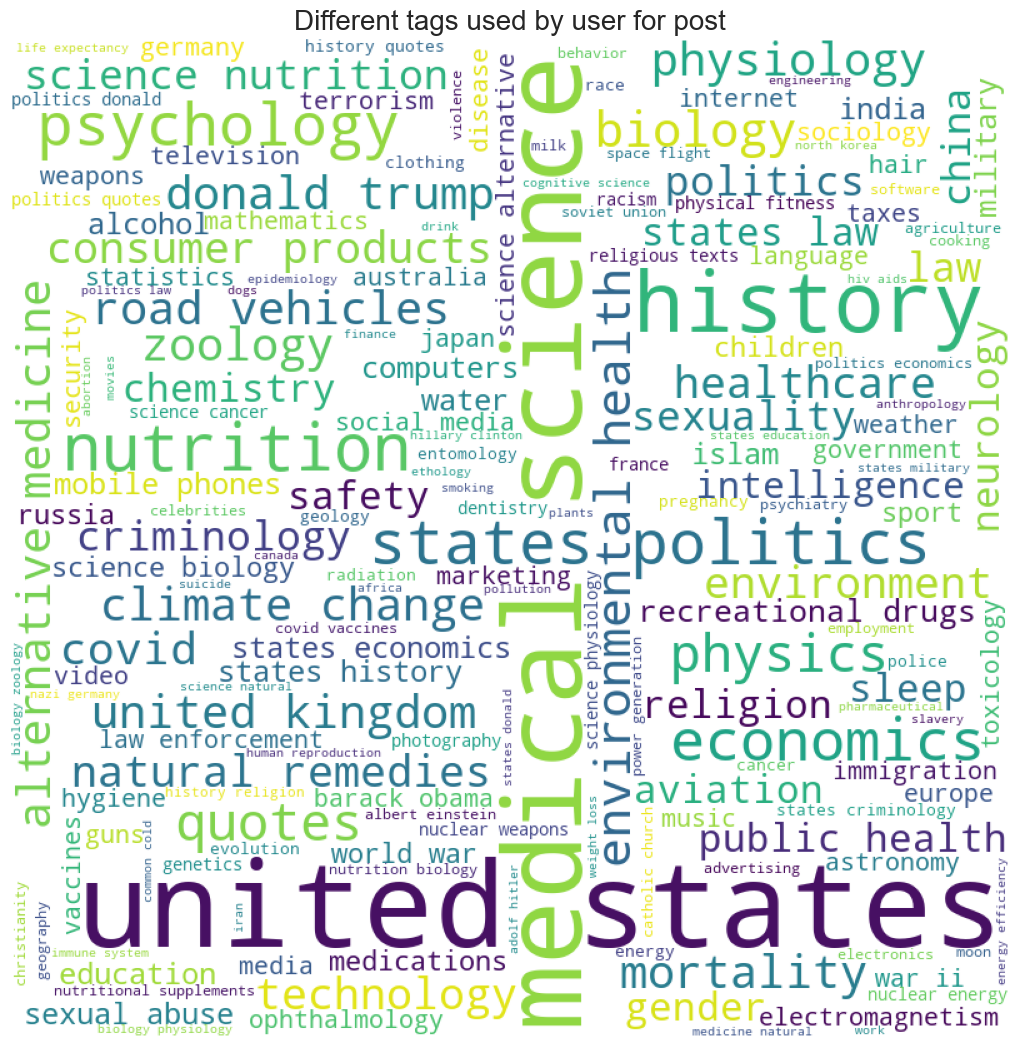

In [24]:
tags_str = ''

# iterate through the csv file
for val in posts_df[~posts_df['Tags'].isna()]['Tags']:
    val = str(val)
    tags_str += " " + val + " "

# Word cloud object for generating and drawing.
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(tags_str)

# plot the WordCloud image					 
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Different tags used by user for post', fontsize=20)

plt.show()

As per the visualization, we can derive:
- `medical science` is the tag that has been used the most.
- Tags like `politics`, `fire` and more, have been used least.

Now we will be checking how many accounts are associated with `engineer` from the `AboutMe` column from `Users` report.

In [25]:
def check_len(data):
    """Checks length is more than 0 or not.
  
    arg:
      data: String/List of string.
      
    return:
      True if length is more than 0, False otherwise
    """
    if type(data) == list:
        return len(data) > 0
    if not pd.isna(data):
        return len(data) > 0
    return False


engineer_df = users_df['AboutMe'].str.findall(r'.*engineer.*', flags=re.IGNORECASE)
users_df['IsEngineer'] = engineer_df.apply(check_len)
users_df.sample(n=5)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,EmailHash,AccountId,New_Location,Country_Code,IsEngineer
33981,48680,101,2019-04-12T23:22:52.100,JTR,2023-11-26T23:42:01.477,NaN,NaN,NaN,0,0,0,NaN,NaN,15131740.0,None,None,False
41797,59903,1,2021-07-03T15:44:45.317,VVidyan,2022-02-22T10:54:46.750,NaN,NaN,<p>I am an undergraduate student majoring in P...,0,0,0,NaN,NaN,18356735.0,None,None,False
9289,14337,101,2013-06-27T07:15:15.973,Dmytro Sirenko,2020-05-14T11:11:32.893,http://dmytrish.net,"Dublin, Ireland","<p>About me:\n<a href=""https://github.com/Earl...",0,2,0,NaN,NaN,309330.0,Ireland,IRL,False
17117,27226,51,2015-07-23T00:21:10.317,ptyx,2023-01-12T22:11:00.770,NaN,NaN,NaN,1,47,0,NaN,NaN,30499.0,None,None,False
23168,37250,1,2016-12-11T22:05:48.010,Yoav Moran,2016-12-11T22:05:48.010,NaN,NaN,NaN,0,0,0,NaN,NaN,2171594.0,None,None,False


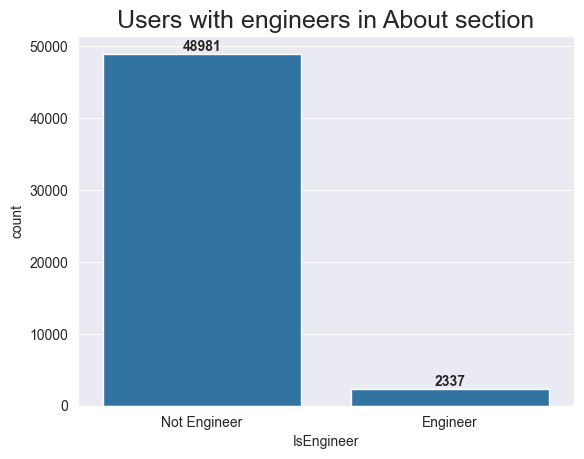

In [26]:
# Plotting count plot
ax = sns.countplot(users_df, x='IsEngineer')

# Annotate Bars in Barplot
for i in ax.containers:
    ax.bar_label(i, fontweight='bold')

# Defining title and x-axis labels
plt.xticks([False, True], ['Not Engineer', 'Engineer'])
plt.title('Users with engineers in About section', fontsize=18)

# Show plot
plt.show()

As per the visualization, we can derive:
- There are 2337 accounts who are from engineers background and 48,981 accounts who are from different backgrounds

We can't fully rely on this conclusion as to know accounts opened by engineers, we need to do more data cleansing and data re-defining, so we can know which user's account comes in which section.

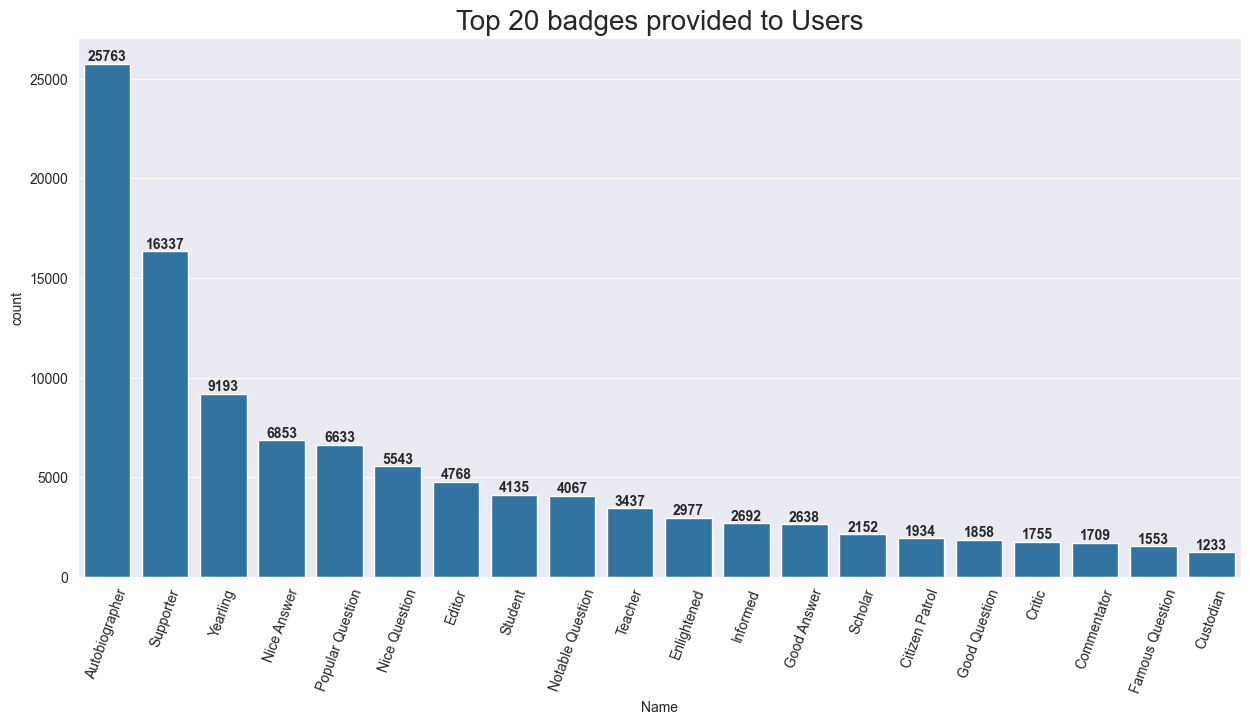

In [27]:
# set the figure size
plt.figure(figsize=(15, 7))

# Creating bar plot
ax = sns.barplot(data=badges_df['Name'].value_counts().reset_index()[:20], x='Name',
                 y='count')

# Annotate Bars in Barplot
for i in ax.containers:
    ax.bar_label(i, fontweight='bold')

# Defining title and x-axis rotation
plt.xticks(rotation=70)
plt.title('Top 20 badges provided to Users', fontsize=20)

# Display plot
plt.show()

As per the visualization, we can derive:
- 25763 users are there with `Autobiographer` as the badge.
- 3437 users are there with `Teacher` as the badge. 

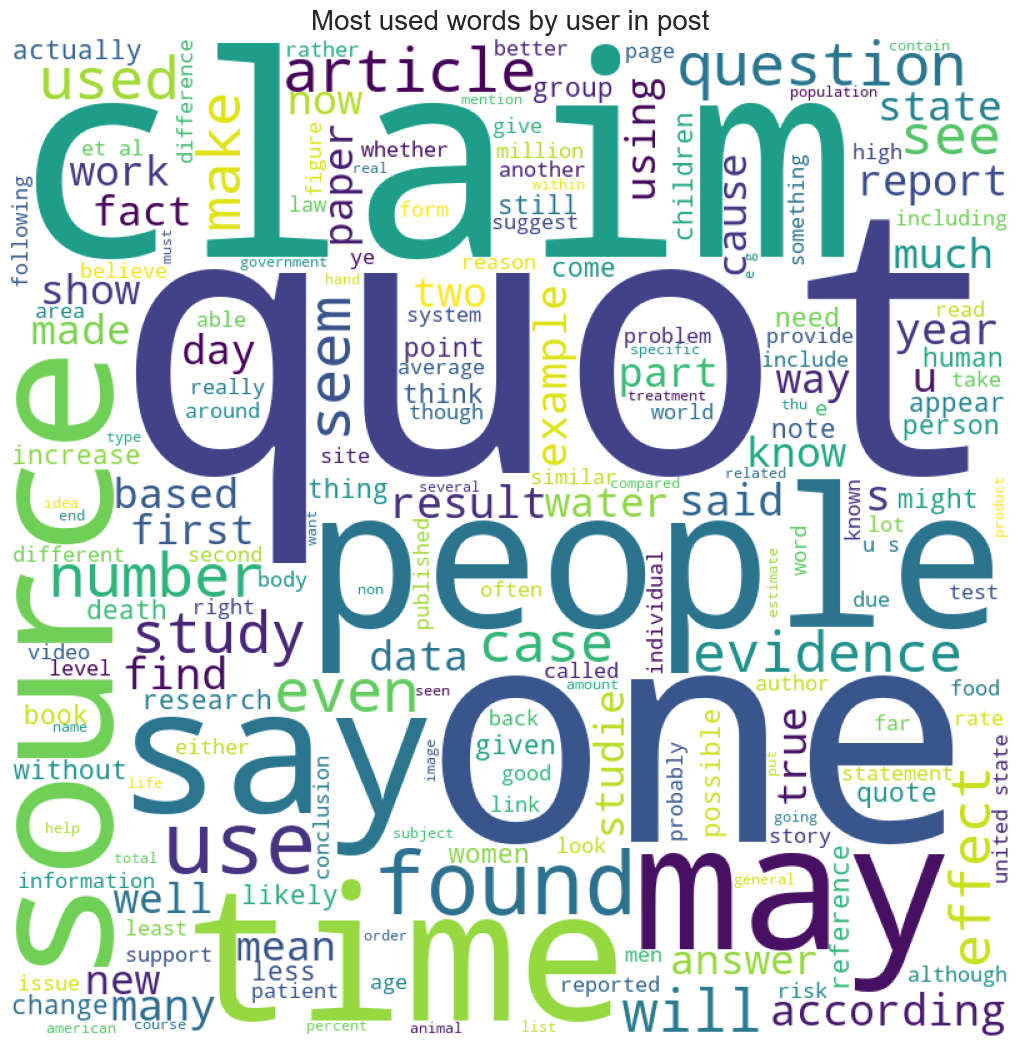

In [28]:
body_str = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in posts_df['Body']:
    # Type casting values to str
    val = str(val)

    # Removing all html tags 
    val = re.sub(r'<[^>]+>', '', val)

    # Removing all URLs
    val = re.sub(r'http\S+', '', val)

    # Replace all extra spaces with a single space
    val = re.sub(r"\s+", " ", val)

    # Convert into lowercase
    val = val.lower()

    body_str += " " + val + " "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(body_str)

# plot the WordCloud image                       
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.title('Most used words by user in post', fontsize=20)

plt.show()

As per the visualization, we can derive:
- `one`, `people` are the keywords that have been used the most.
- Keywords like `image`, `must` and more has been used least.As per the visualization, we can derive:
- `one`, `people` are the keywords that have been used the most.
- Keywords like `image`, `must` and more, have been used least.

# Issues Arises
- Users haven't provided valid information, so `Skeptics` can make a validation over users who sign-in, with valid data but not purely personal data as it will reflect over data privacy.
- Using more high-end data cleaning and data modification, things can be far better, which we have faced here.

# Summary
In this report we have worked with [Skeptics](skeptics.stackexchange.com) website dataset. Over this dataset we have done some exploratory data analysis, data pre-processing, data-cleaning, and more.
In this case-study we have understood about the usage of:
- Python reg-ex library.
- WordCloud of depicting words in graphical representation.
- Dynamic XML to CSV file conversion using custom code, where we can use the pandas library also.

# References
- https://stackexchange.com/sites?view=list#oldest
- https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede
- https://archive.org/details/stackexchange
- https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
- Surfing over google platform.
- Olympus dashboard course materials
- Live session recordings.